In [40]:
%matplotlib inline


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras import optimizers

import tensorflow as tf
import time


from sklearn.datasets import make_moons, make_circles, make_classification

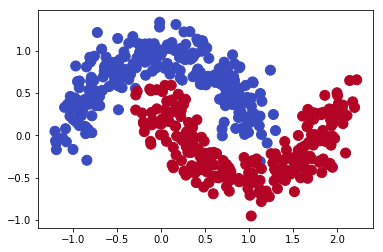

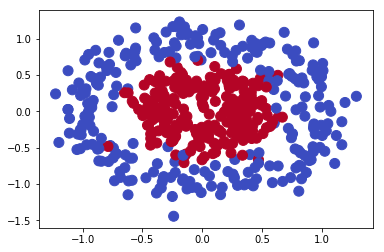

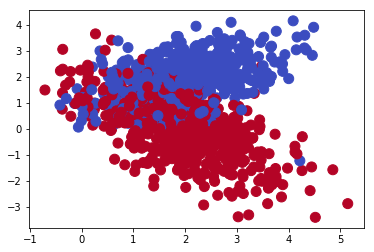

In [41]:



def dataset_generator():
    """
    generate dataset for binary classification
    :return:
    """
    X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=2,
                               random_state=1, n_clusters_per_class=1)
    
    rng = np.random.RandomState(2)
    X += 2 * rng.uniform(size=X.shape)
    linearly_separable = (X, y)

    datasets = [make_moons(n_samples=500, noise=0.15, random_state=0),
                make_circles(n_samples=500, noise=0.15, factor=0.4, random_state=1),
                linearly_separable
                ]
    return datasets


datasets = dataset_generator()

for dataset in datasets:
    
    data, annot = dataset
    fig, ax = plt.subplots()
    ax.scatter(data.transpose()[0], data.transpose()[1], marker = 'o', s = 100, c = annot, cmap=plt.cm.coolwarm )
    plt.plot()

Choose dataset to work with.
- 0 : moon
- 1 : circle
- 2 : linearly separable

We are using 70% of the examples for training, 30% for testing

In [42]:
data, annot = datasets[1]
cut=int(len(data)*0.7)
x_train, y_train= data[:cut], annot[:cut]
x_test, y_test=data[cut:], annot[cut:]

Now we will declare and train our NN model

In [43]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(2, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(6, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(6, activation='relu'),
  tf.keras.layers.Dense(2, activation='softmax')
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=200, verbose=1, batch_size=32)

# print(model.evaluate(x_train, y_train))
print(model.evaluate(x_test, y_test))
# print(model.predict(x_test)[1])




Epoch 1/200
350/350 [==============================] - 1s 4ms/step - loss: 0.6966 - acc: 0.4943
Epoch 2/200
350/350 [==============================] - 0s 51us/step - loss: 0.6958 - acc: 0.5000
Epoch 3/200
350/350 [==============================] - 0s 72us/step - loss: 0.6951 - acc: 0.4943
Epoch 4/200
350/350 [==============================] - 0s 70us/step - loss: 0.6943 - acc: 0.4657
Epoch 5/200
350/350 [==============================] - 0s 75us/step - loss: 0.6933 - acc: 0.5257
Epoch 6/200
350/350 [==============================] - 0s 63us/step - loss: 0.6923 - acc: 0.5686
Epoch 7/200
350/350 [==============================] - 0s 55us/step - loss: 0.6916 - acc: 0.5771
Epoch 8/200
350/350 [==============================] - 0s 69us/step - loss: 0.6911 - acc: 0.5971
Epoch 9/200
350/350 [==============================] - 0s 61us/step - loss: 0.6906 - acc: 0.6200
Epoch 10/200
350/350 [==============================] - 0s 81us/step - loss: 0.6897 - acc: 0.6200
Epoch 11/200
350/350 [========

350/350 [==============================] - 0s 62us/step - loss: 0.4412 - acc: 0.8171
Epoch 85/200
350/350 [==============================] - 0s 66us/step - loss: 0.4398 - acc: 0.8086
Epoch 86/200
350/350 [==============================] - 0s 64us/step - loss: 0.4385 - acc: 0.8086
Epoch 87/200
350/350 [==============================] - 0s 59us/step - loss: 0.4372 - acc: 0.8086
Epoch 88/200
350/350 [==============================] - 0s 57us/step - loss: 0.4357 - acc: 0.8086
Epoch 89/200
350/350 [==============================] - 0s 62us/step - loss: 0.4347 - acc: 0.8086
Epoch 90/200
350/350 [==============================] - 0s 62us/step - loss: 0.4337 - acc: 0.8114
Epoch 91/200
350/350 [==============================] - 0s 59us/step - loss: 0.4325 - acc: 0.8114
Epoch 92/200
350/350 [==============================] - 0s 61us/step - loss: 0.4313 - acc: 0.8114
Epoch 93/200
350/350 [==============================] - 0s 63us/step - loss: 0.4303 - acc: 0.8143
Epoch 94/200
350/350 [===========

350/350 [==============================] - 0s 58us/step - loss: 0.3842 - acc: 0.8257
Epoch 168/200
350/350 [==============================] - 0s 65us/step - loss: 0.3836 - acc: 0.8257
Epoch 169/200
350/350 [==============================] - 0s 61us/step - loss: 0.3835 - acc: 0.8257
Epoch 170/200
350/350 [==============================] - 0s 57us/step - loss: 0.3831 - acc: 0.8286
Epoch 171/200
350/350 [==============================] - 0s 61us/step - loss: 0.3818 - acc: 0.8286
Epoch 172/200
350/350 [==============================] - 0s 59us/step - loss: 0.3816 - acc: 0.8257
Epoch 173/200
350/350 [==============================] - 0s 69us/step - loss: 0.3808 - acc: 0.8257
Epoch 174/200
350/350 [==============================] - 0s 76us/step - loss: 0.3805 - acc: 0.8286
Epoch 175/200
350/350 [==============================] - 0s 69us/step - loss: 0.3804 - acc: 0.8286
Epoch 176/200
350/350 [==============================] - 0s 60us/step - loss: 0.3794 - acc: 0.8286
Epoch 177/200
350/350 [=

Now let's draw the border that we have learnt

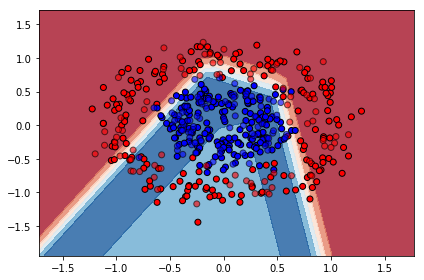

In [44]:


ax = plt.subplot()

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
x_min, x_max = data[:, 0].min() - .5, data[:, 0].max() + .5
y_min, y_max = data[:, 1].min() - .5, data[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

XX = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(XX)[:, 1]
Z = Z.reshape(xx.shape)

ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

# Plot the training points
ax.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k')
# Plot the testing points
ax.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap=cm_bright,
           edgecolors='k', alpha=0.6)

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

plt.tight_layout()
plt.plot()
plt.show()

Now, you should try to changing : 
- the used dataset
- number of epochs
- the batch size
- number of examples
- the neural network architecture